In [24]:
import onnxruntime as ort
import numpy as np
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
# !pip install onnxruntime pillow torchvision --quiet

IMG_SIZE = 224
IMG_PATH = "pneumania/gettyimages-157560163-612x612.jpg"

Вероятность пневмонии: 0.9949
Заключение: ПНЕВМОНИЯ


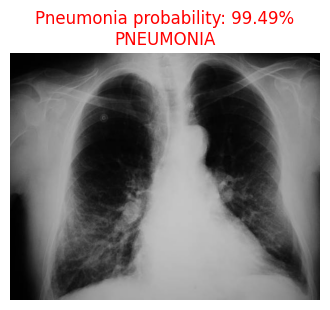

In [25]:
sess = ort.InferenceSession(
    onnx_path,
    providers=["CPUExecutionProvider"]
)

# sess = ort.InferenceSession(onnx_path, providers=["DmlExecutionProvider"])

tfms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

img = Image.open(IMG_PATH).convert("RGB")
x = tfms(img).unsqueeze(0).numpy()  # (1,3,224,224)

pred = sess.run(None, {"input": x})[0]
prob = 1 / (1 + np.exp(-pred))  
prob = float(prob.squeeze())


print(f"Вероятность пневмонии: {prob:.4f}")
if prob > 0.5:
    print("Заключение: ПНЕВМОНИЯ")
else:
    print("Заключение: НОРМА")

plt.figure(figsize=(4,4))
plt.imshow(img)
plt.axis("off")
plt.title(f"Pneumonia probability: {prob:.2%}\n"
          + ("PNEUMONIA" if prob > 0.5 else "NORMAL"),
          color="red" if prob > 0.5 else "green")
plt.show()
